## 2. Exploratory Data Analysis

The objective of this section is to explore the dataset, understand variable distributions, detect patterns, and identify relationships between features and the target variable (price).

No structural changes to the dataset are performed in this phase.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/raw/house_data.csv")
df["date"] = pd.to_datetime(df["date"])

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 2.1 Target Variable Analysis - Price Distribution

In [3]:
df["price"].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

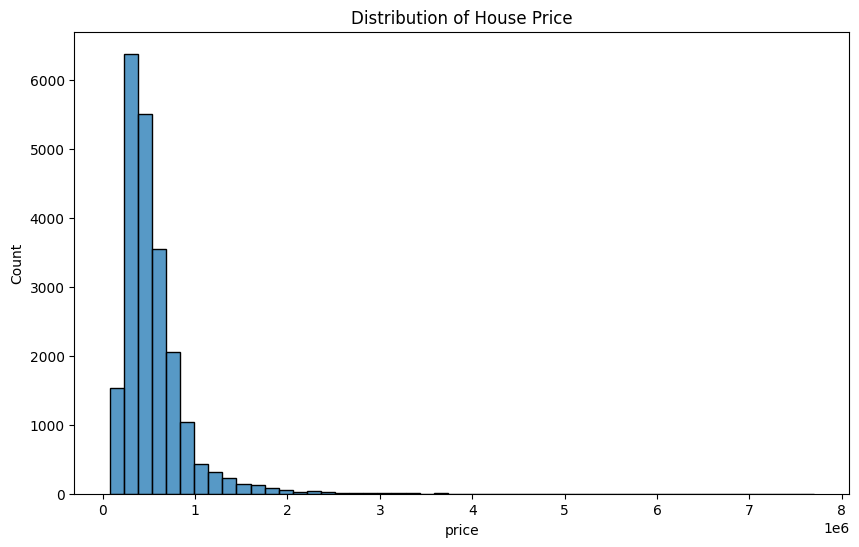

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(df["price"], bins=50)
plt.title("Distribution of House Price")
plt.show()

### Observations

- The distribution of house price is right-skewed.
- Most properties are concentrated below $1,000,000.
- A small number of high-end properties create a long right tail.
- The presence of extreme values suggests potential outliers.

The mean price ($540,000) is higher than the median ($450,000), confirming positive skewness.

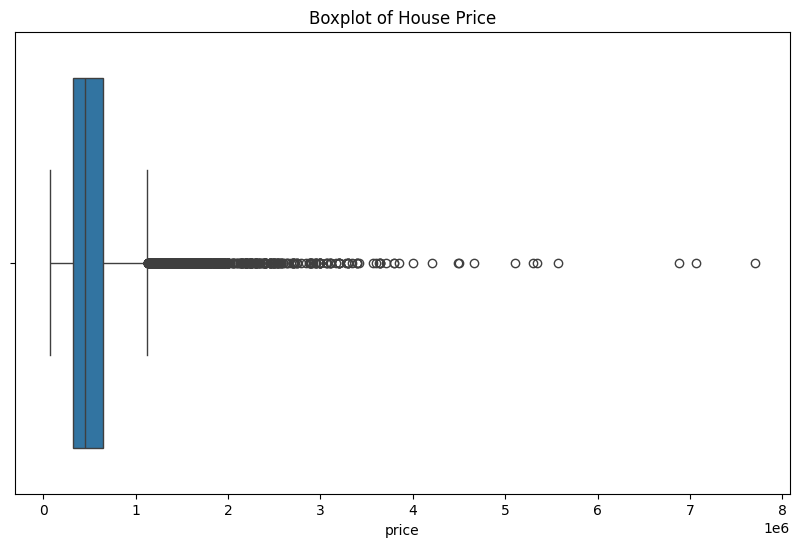

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["price"])
plt.title("Boxplot of House Price")
plt.show()

The boxplot confirms the observations from the histogram.

Most properties are priced below $1,000,000, with a strong concetration in the lower price range.

The distribution shows a long right tail, indicating the presence of numerous high-value outliers.

This confirms that the target variable is positively skewed.

## 2.2 Relationship Between Living Area and Price

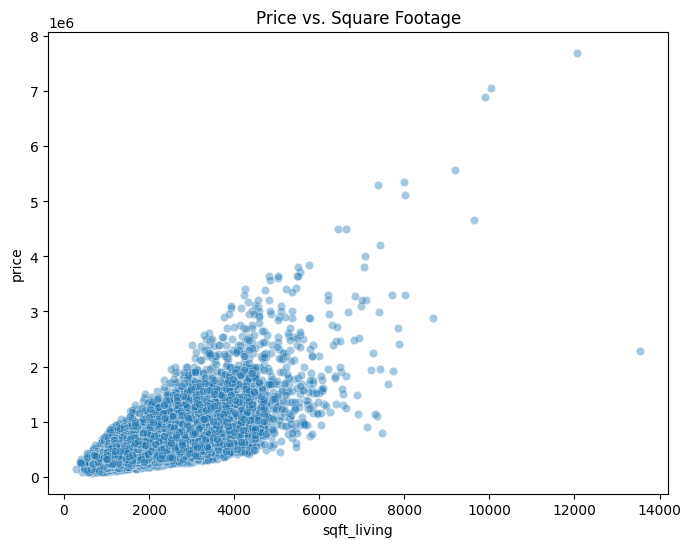

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["sqft_living"], y=df["price"], alpha=0.4)
plt.title("Price vs. Square Footage")
plt.show()

The scatter plot shows a clear positive relationship between living area and price.

As square footage increases, property prices generally increase as well, indicating that `sqft_living` is likely a strong predictor of price.

However, the variance of prices increases for larger properties, suggesting heteroscedasticity. This indicates that additional factors (e.g., location, grade, waterfront) may play a stronger role in high-end properties.

## 2.3 Correlation Analysis

In [7]:
corr = df.corr(numeric_only=True)
corr["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

`sqft_living` shows the strongest positive correlation with price (0.70), confirming earlier observations from the scatter plot.

`grade` and ``sqft_above` also demonstrate strong positive relationships with price, suggesting that property size and construction quality are key drivers of value.

Interestingly, `sqft_lot` shows very weak correlation with price, indicating that lot size may not be a primary determinant of property value in this dataset.

## 2.4 Full Correlation Structure (Heatmap)

In this section, we analyze the overall correlation structure between all numeric features in the dataset.

The goal is to:
- Identify strongly correlated predictors with the target variable (price),
- Detect multicollinearity between independent variables,
- Understand relationships between size-related and location-related features.

Thus step is important before model development, as highly correlated features may introduce redundancy and instability in linear models.

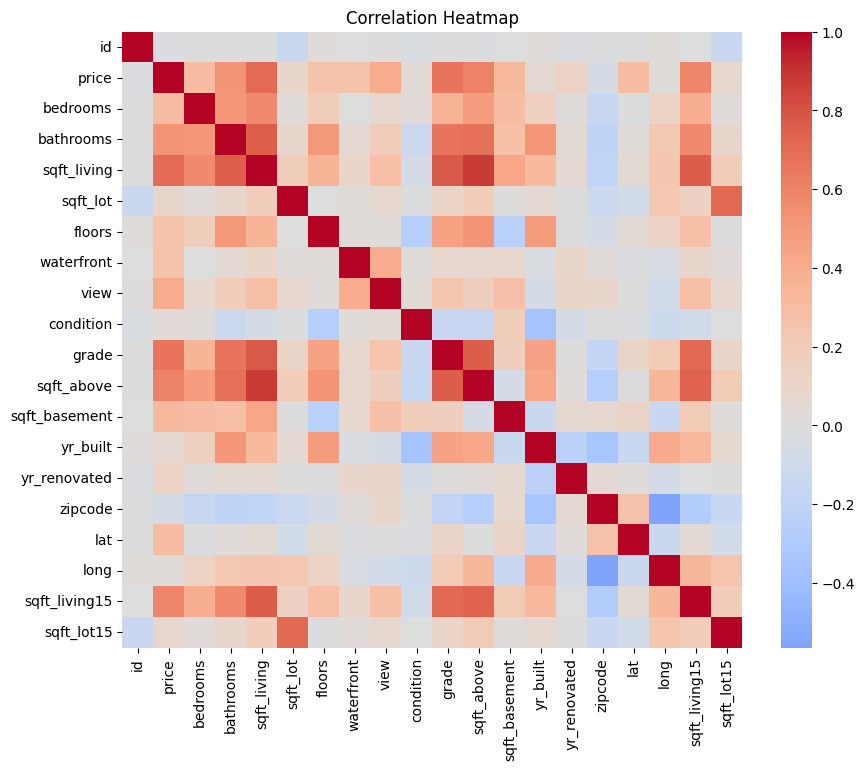

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

#### Key Observations

- `sqft_living` shows the strongest positive correlation with price.
- `grade` and `sqft_above` also demonstrate strong relationships with price.
- Strong correlations exist between `sqft_living`, `sqft_above`, and `sqft_basement`, indicating potential multicollinearity.
- Size-related variables are closely related to each other.
- Some location features (e.g., `lat`) show moderate correlation with price.

## 2.5 Log Transformation of Target Variable

Earlier analysis showed that the target variable (`price`) is highly right-skewed, with a long tail of high-value properties.
Such skewness can negatively impact linear regression models, as they assume normally distributed residuals and homoscedasticity.
To reduce skewness and stabilize variance, we apply a logarithmic transformation to the target variable.

In [10]:
df["log_price"] = np.log(df["price"])

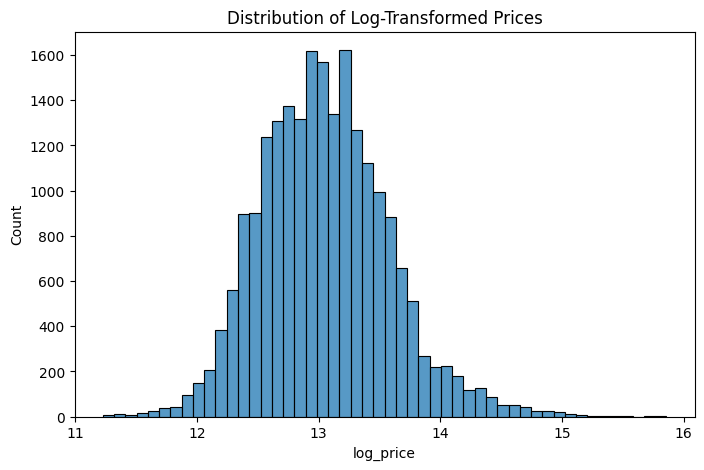

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(df["log_price"], bins=50)
plt.title("Distribution of Log-Transformed Prices")
plt.show()

#### Observation after transformation

- The log-transformed price distribution appears much closer to normal.
- Extreme high-value outliers have reduced influence.
- Variance across price ranges appears more stable.

This transformation is expected to improve model performance and interpretability.